In [1]:
import pandas as pd
import os
from modules import crfb
from modules import covid
from modules import fnc
%matplotlib inline

In [2]:
# Get the most recent dataset that we have on file
df = crfb.get_data_single()
# Download all the datasets we have, using the column 'Date CRFB Downloaded'
#df = crfb.get_data_all()
#df
states_df = df.loc[df['Recipient Type'] == 'Health Provider']
states_df

loading data from date 2021-02-09 : file 20210209_cmt.xlsx...


,Recipient State,Amount Committed/Disbursed,Date,Recipient Type,Legislation,Agency
1320,Alabama,4.494819e+08,2020-04-10,Health Provider,CARES Act,HHS
1321,Alaska,7.124812e+07,2020-04-10,Health Provider,CARES Act,HHS
1322,Arizona,7.075875e+08,2020-04-10,Health Provider,CARES Act,HHS
1323,Arkansas,3.265360e+08,2020-04-10,Health Provider,CARES Act,HHS
1324,California,2.920961e+09,2020-04-10,Health Provider,CARES Act,HHS
...,...,...,...,...,...,...
7286,Wisconsin,7.085824e+07,2020-05-08,Health Provider,NaN,CMS
7287,Wyoming,2.499184e+06,2020-05-08,Health Provider,NaN,CMS
7288,Minnesota,3.312674e+07,2020-05-06,Health Provider,CARES Act,HHS
7289,Montana,1.386604e+07,2020-05-06,Health Provider,CARES Act,HHS


In [3]:
#check if all the column have the same amount of values
states = 'Recipient State'
money = 'Amount Committed/Disbursed'
fnc.clean_check(states_df)

 Great News! your dataset is complete


[]

In [4]:
state_group_df = states_df.groupby('Recipient State')[money].mean().reset_index()
state_group_df



,Recipient State,Amount Committed/Disbursed
0,Alabama,1.792775e+08
1,Alaska,4.181529e+07
2,Arizona,2.210583e+08
3,Arkansas,1.372664e+08
4,California,1.148195e+09
5,Colorado,1.762672e+08
6,Connecticut,1.881214e+08
7,Delaware,6.059996e+07
8,Florida,7.226082e+08
9,Georgia,3.934504e+08


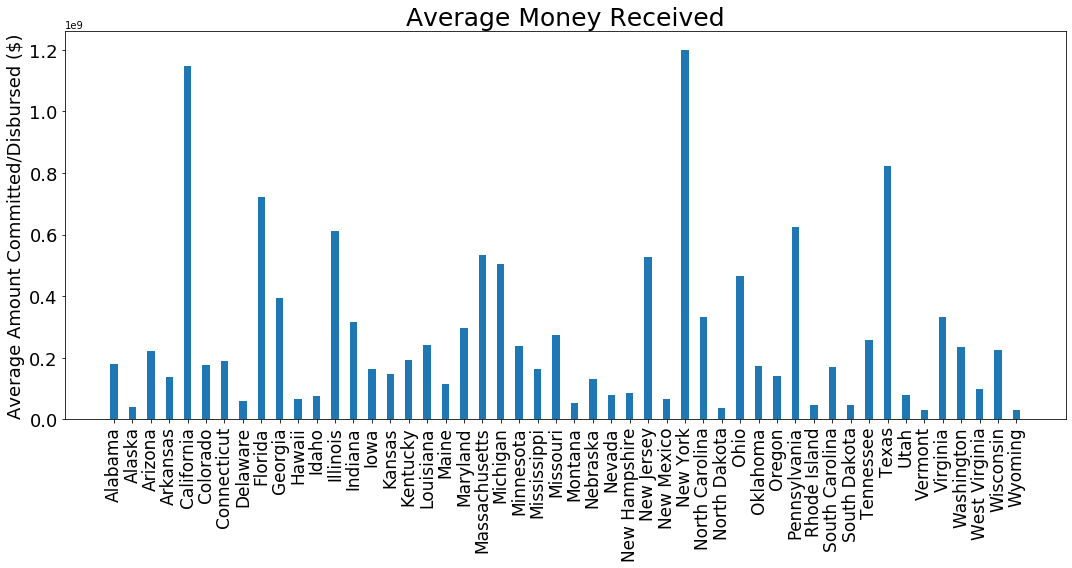

In [5]:
#plotting the data for all the states
fig_title = 'Average_money_received_all_states.png'
fnc.bar_plot(state_group_df[states],  state_group_df[money], 'Average Money Received',fnc.where_save(fig_title))

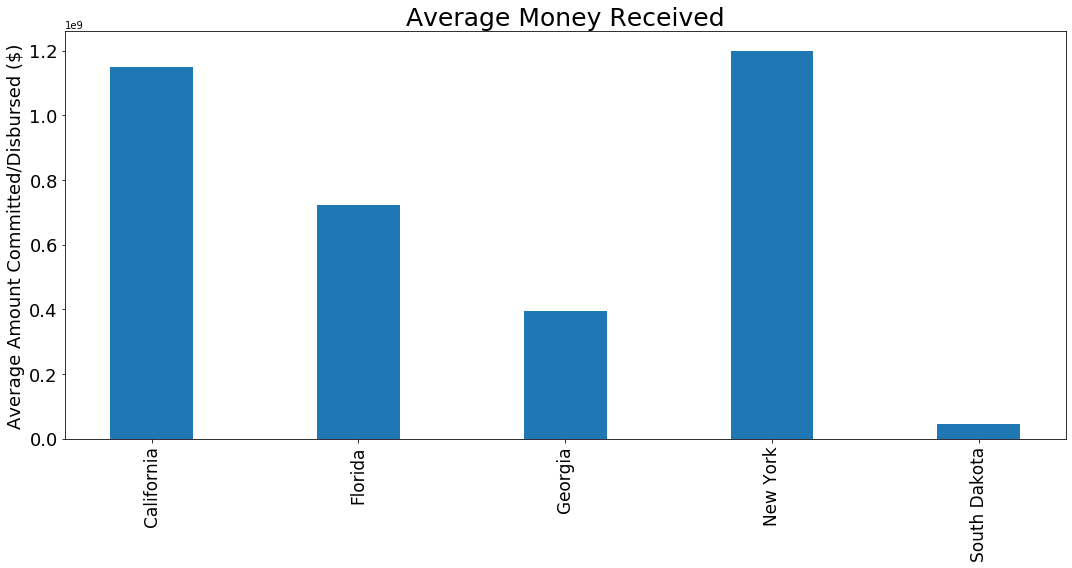

In [6]:
#plotting the data only for the states of interest
state_OI = ['New York', 'South Dakota','Florida', 'California','Georgia']
state_groupOI_df = state_group_df.loc[state_group_df[states].isin(state_OI)]
fig_title = 'Average_money_SOI.png'
fnc.bar_plot(state_groupOI_df[states],  state_groupOI_df[money], 'Average Money Received',fnc.where_save(fig_title))

In [7]:
import datetime as dt
#converting the dates in timestamp - it will serve the purpose later on probably
dates = states_df['Date'].to_list()
timestamp = [dt.datetime.timestamp(dates[x]) for x, date in enumerate(dates) ]
states_df['Timestamp'] = timestamp
states_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Recipient State,Amount Committed/Disbursed,Date,Recipient Type,Legislation,Agency,Timestamp
1320,Alabama,4.494819e+08,2020-04-10,Health Provider,CARES Act,HHS,1.586491e+09
1321,Alaska,7.124812e+07,2020-04-10,Health Provider,CARES Act,HHS,1.586491e+09
1322,Arizona,7.075875e+08,2020-04-10,Health Provider,CARES Act,HHS,1.586491e+09
1323,Arkansas,3.265360e+08,2020-04-10,Health Provider,CARES Act,HHS,1.586491e+09
1324,California,2.920961e+09,2020-04-10,Health Provider,CARES Act,HHS,1.586491e+09
...,...,...,...,...,...,...,...
7286,Wisconsin,7.085824e+07,2020-05-08,Health Provider,NaN,CMS,1.588910e+09
7287,Wyoming,2.499184e+06,2020-05-08,Health Provider,NaN,CMS,1.588910e+09
7288,Minnesota,3.312674e+07,2020-05-06,Health Provider,CARES Act,HHS,1.588738e+09
7289,Montana,1.386604e+07,2020-05-06,Health Provider,CARES Act,HHS,1.588738e+09


In [8]:
# To filter by date use
#covid_df = covid.get_data(date_min=dt.datetime(2020, 10, 23), date_max=dt.datetime(2021, 2, 9))
# else, use this
covid_df = covid.get_data()
covid_df

,date,state,positive,negative,onVentilatorCumulative,recovered,death,hospitalized,positiveTests
0,2021-02-10,Alaska,53991.0,0.0,0.0,0.0,280.0,1224.0,65272
1,2021-02-10,Alabama,476067.0,1830673.0,1463.0,264621.0,8888.0,43685.0,0
2,2021-02-10,Arkansas,309940.0,2306389.0,1469.0,290548.0,5174.0,14211.0,75183
3,2021-02-10,Arizona,789245.0,2841495.0,0.0,109543.0,14462.0,55088.0,0
4,2021-02-10,California,3362981.0,0.0,0.0,0.0,44995.0,0.0,0
...,...,...,...,...,...,...,...,...,...
17365,2020-01-17,Washington,0.0,0.0,0.0,0.0,0.0,0.0,0
17366,2020-01-16,Washington,0.0,0.0,0.0,0.0,0.0,0.0,0
17367,2020-01-15,Washington,0.0,0.0,0.0,0.0,0.0,0.0,0
17368,2020-01-14,Washington,0.0,0.0,0.0,0.0,0.0,0.0,0


In [9]:
positive = 'positiveTests'
ventilator = 'onVentilatorCumulative'
fnc.clean_check(covid_df)

UhOh, at least one of the column contains 'invalid' data (0., NA, NULL)
The column positive has problems
The column negative has problems
The column onVentilatorCumulative has problems
The column recovered has problems
The column death has problems
The column hospitalized has problems
The column positiveTests has problems


['positive',
 'negative',
 'onVentilatorCumulative',
 'recovered',
 'death',
 'hospitalized',
 'positiveTests']

In [10]:
#checking for 0. values
covid_df[covid_df[positive] == 0.]

,date,state,positive,negative,onVentilatorCumulative,recovered,death,hospitalized,positiveTests
1,2021-02-10,Alabama,476067.0,1830673.0,1463.0,264621.0,8888.0,43685.0,0
3,2021-02-10,Arizona,789245.0,2841495.0,0.0,109543.0,14462.0,55088.0,0
4,2021-02-10,California,3362981.0,0.0,0.0,0.0,44995.0,0.0,0
12,2021-02-10,Idaho,166095.0,481739.0,0.0,87505.0,1780.0,6839.0,0
13,2021-02-10,Illinois,1152995.0,15669390.0,0.0,0.0,21869.0,0.0,0
...,...,...,...,...,...,...,...,...,...
17365,2020-01-17,Washington,0.0,0.0,0.0,0.0,0.0,0.0,0
17366,2020-01-16,Washington,0.0,0.0,0.0,0.0,0.0,0.0,0
17367,2020-01-15,Washington,0.0,0.0,0.0,0.0,0.0,0.0,0
17368,2020-01-14,Washington,0.0,0.0,0.0,0.0,0.0,0.0,0


In [11]:
covid_grouped_df = covid_df.groupby('state')['positive',ventilator,'death','hospitalized',positive].sum().reset_index()
covid_grouped_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,state,positive,onVentilatorCumulative,death,hospitalized,positiveTests
0,Alabama,49837346.0,261927.0,796511.0,5006774.0,0
1,Alaska,4769316.0,0.0,24195.0,126144.0,5460830
2,Arizona,75222759.0,0.0,1528572.0,6004239.0,14289
3,Arkansas,29678846.0,192930.0,468866.0,1652693.0,4467398
4,California,292943697.0,0.0,4485595.0,0.0,0
5,Colorado,38837258.0,0.0,760946.0,2896858.0,4391803
6,Connecticut,26707211.0,0.0,1395731.0,3268966.0,825295
7,Delaware,8087593.0,0.0,194052.0,0.0,8769913
8,Florida,200427774.0,0.0,3705028.0,11459133.0,281213029
9,Georgia,98723295.0,0.0,1927696.0,7595180.0,91126105


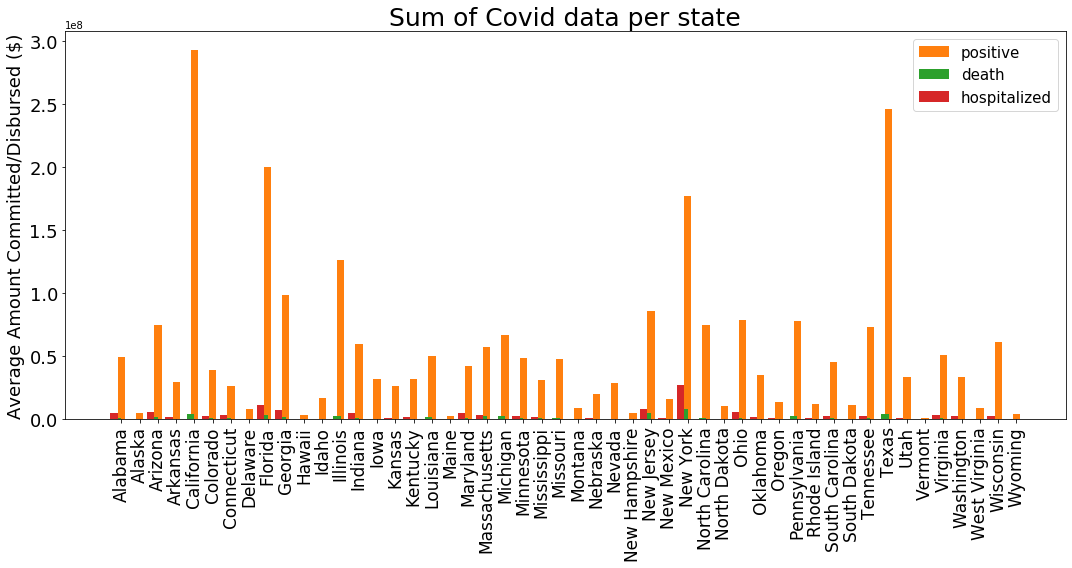

In [12]:
pdh = ['positive','death','hospitalized']
fig_title = 'sum_up_covid_data_all_states.png'
fnc.bar_plot(covid_grouped_df['state'], covid_grouped_df[pdh], 'Sum of Covid data per state',fnc.where_save(fig_title))


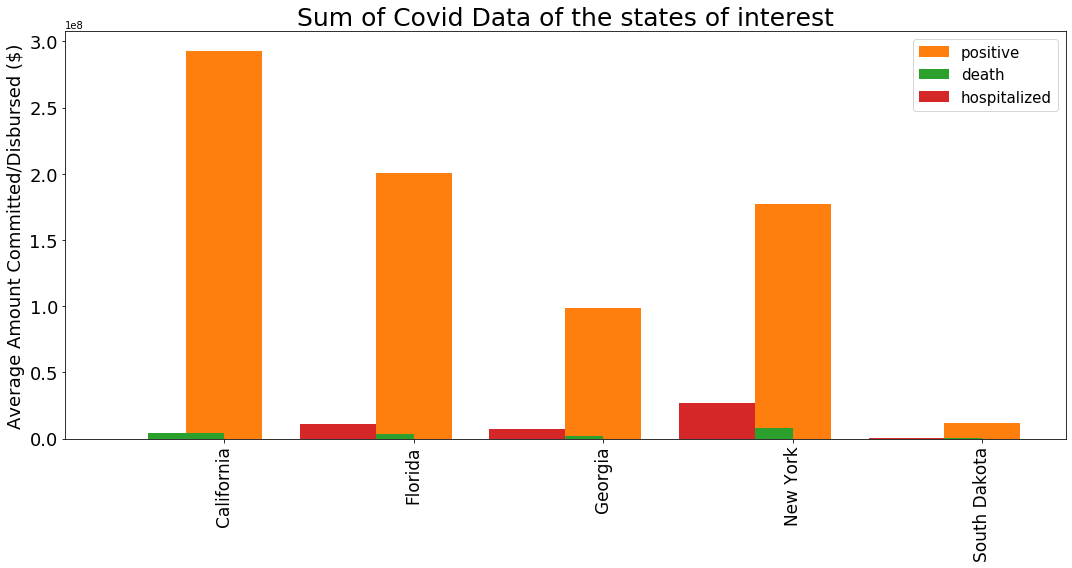

In [13]:
covid_groupOI_df = covid_grouped_df.loc[covid_grouped_df['state'].isin(state_OI)]
fig_title = 'sum_covid_OI.png'
fnc.bar_plot(covid_groupOI_df['state'], covid_groupOI_df[pdh], 'Sum of Covid Data of the states of interest',fnc.where_save(fig_title))

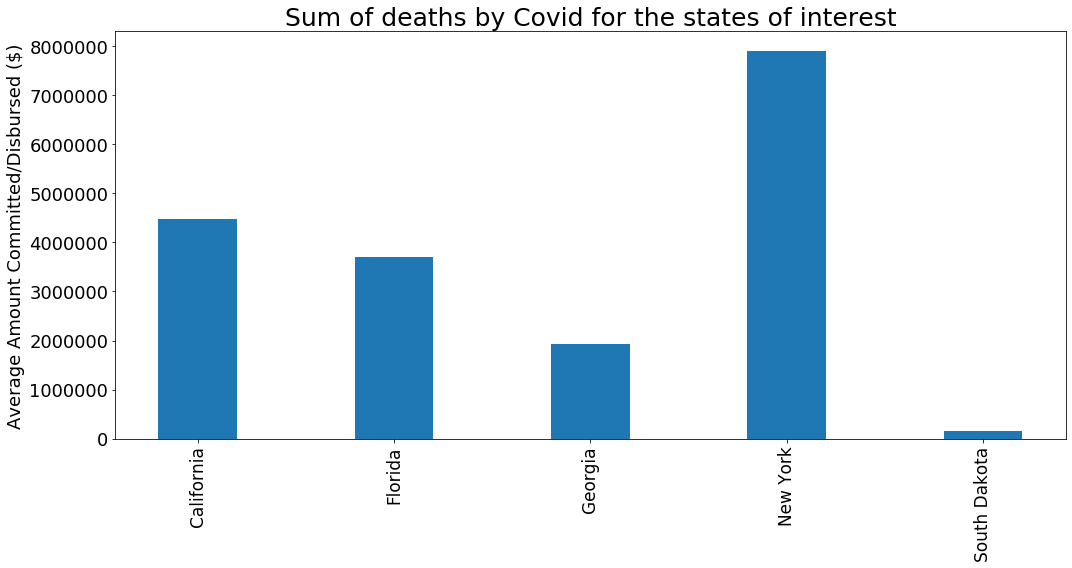

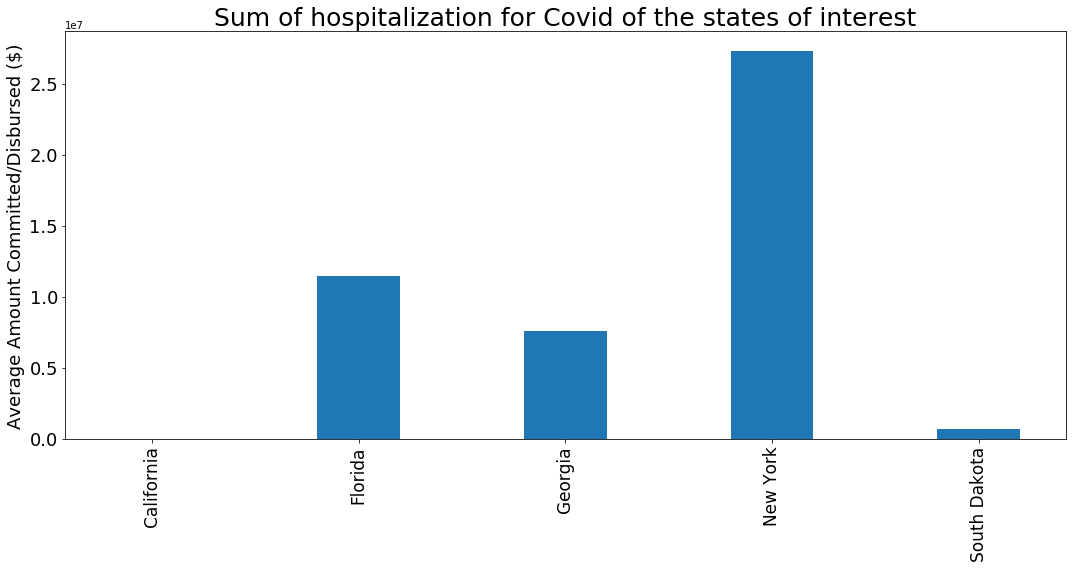

In [14]:
fig_title = 'sum_death_covid_OI.png'
fnc.bar_plot(covid_groupOI_df['state'], covid_groupOI_df['death'], 'Sum of deaths by Covid for the states of interest',fnc.where_save(fig_title))
fig_title = 'sum_hospitalized_covid_OI.png'
fnc.bar_plot(covid_groupOI_df['state'], covid_groupOI_df['hospitalized'], 'Sum of hospitalization for Covid of the states of interest',fnc.where_save(fig_title))

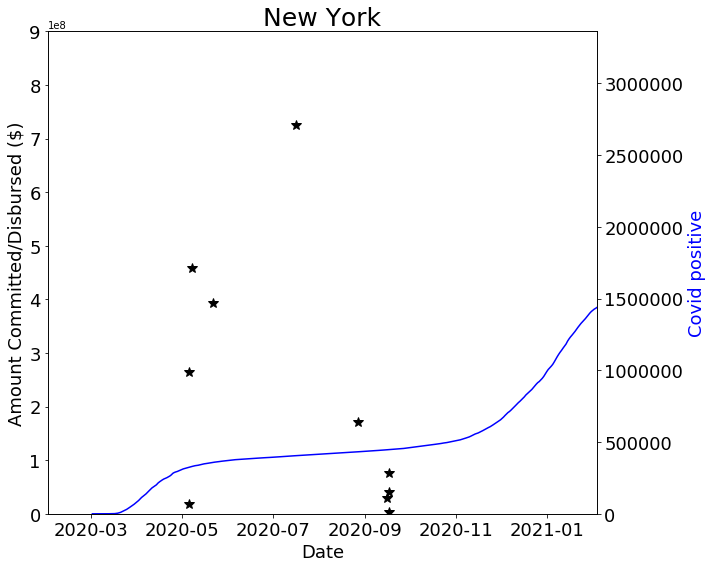

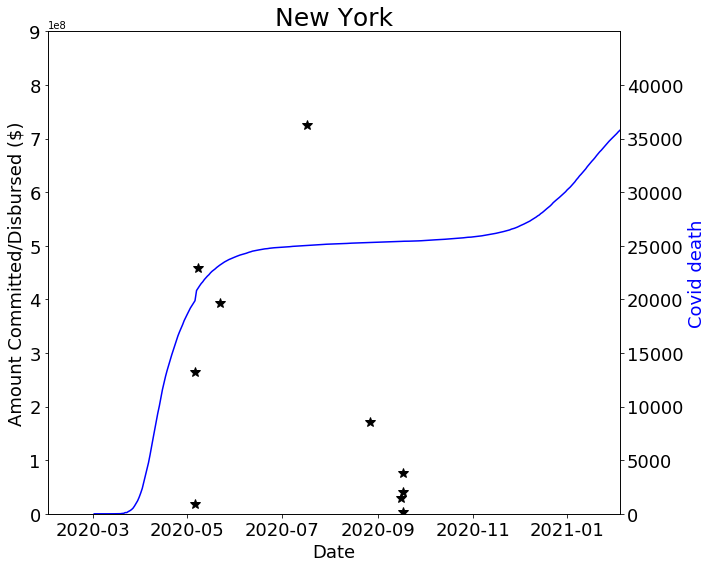

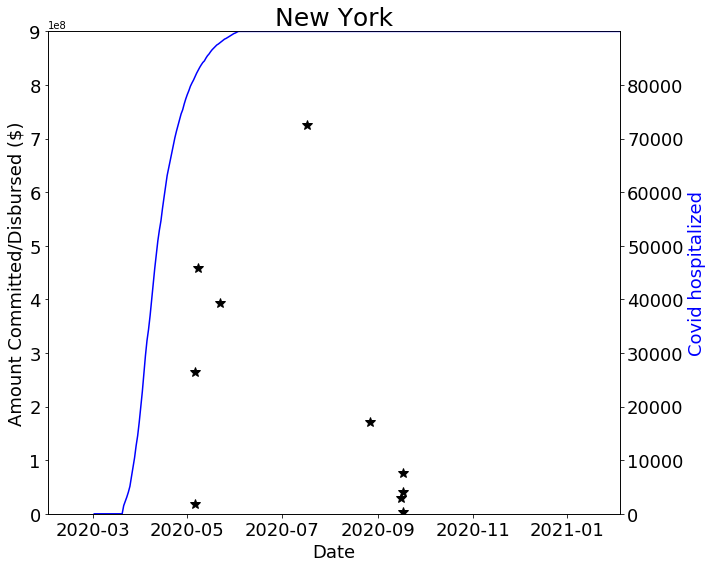

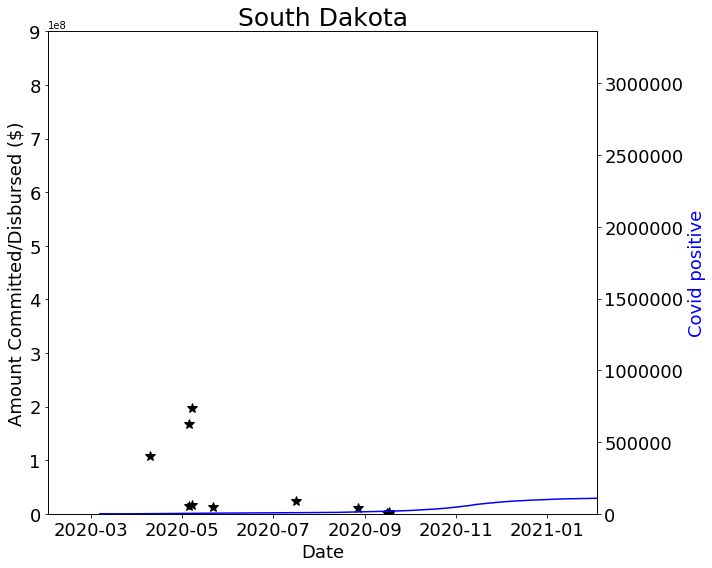

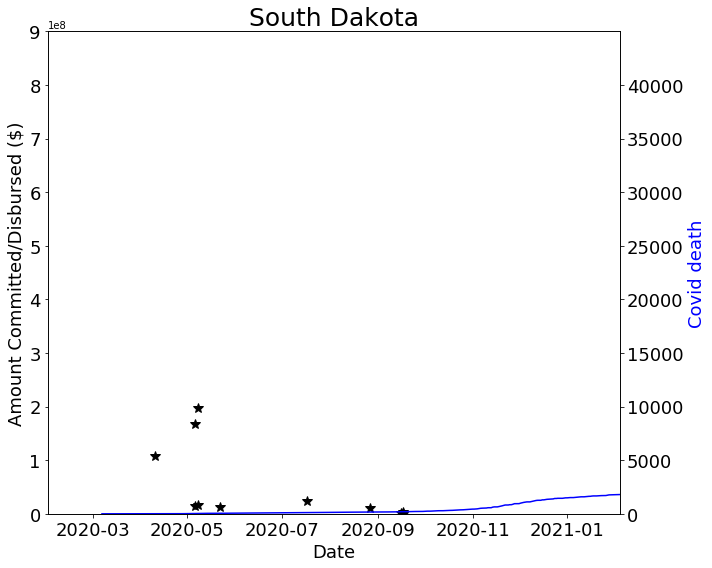

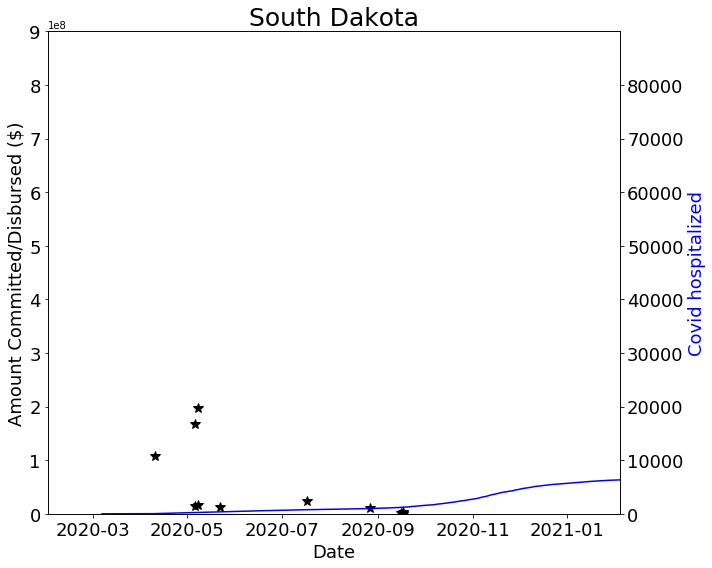

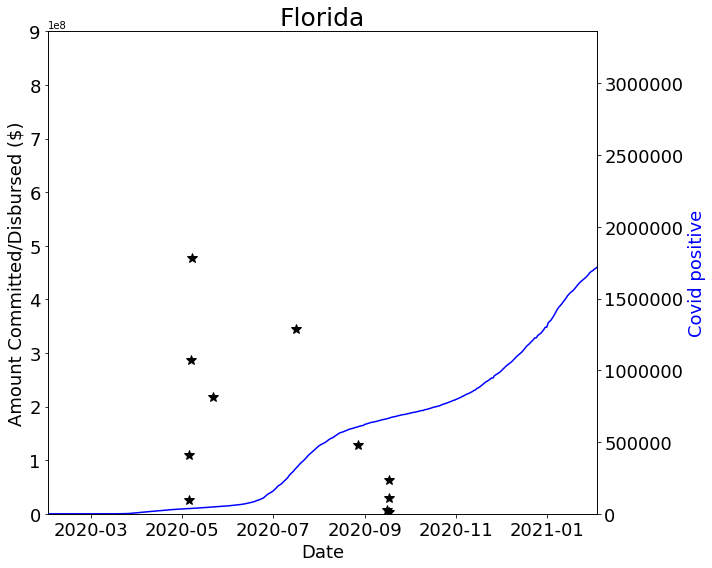

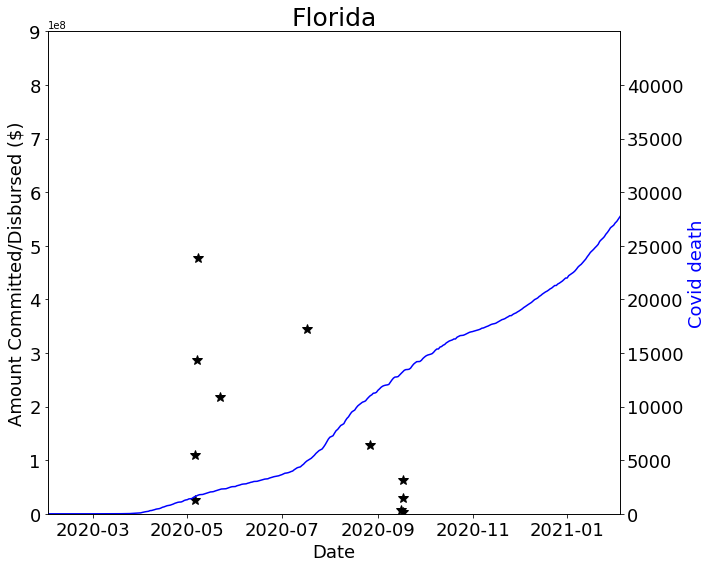

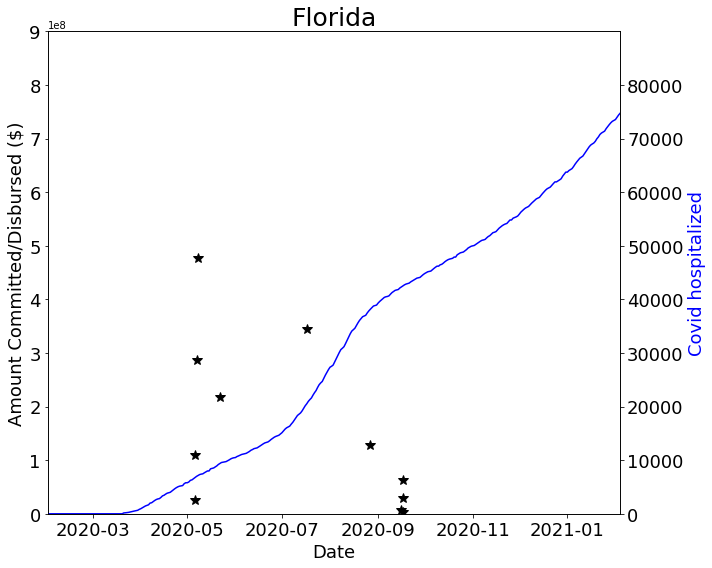

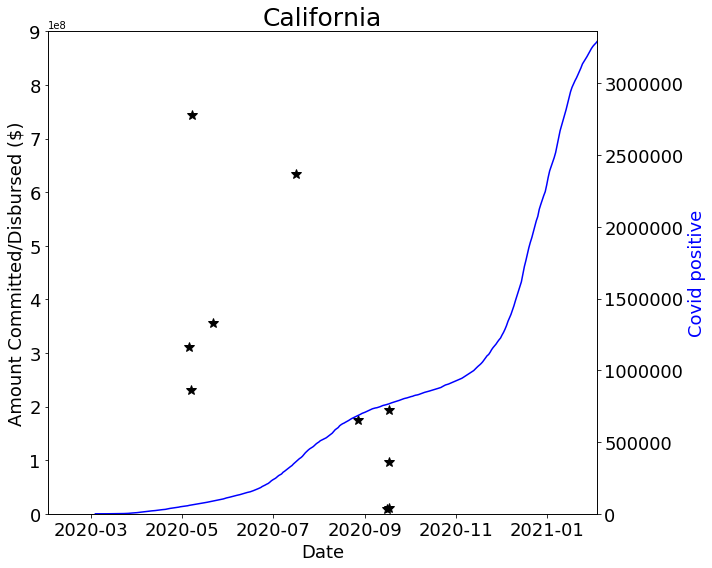

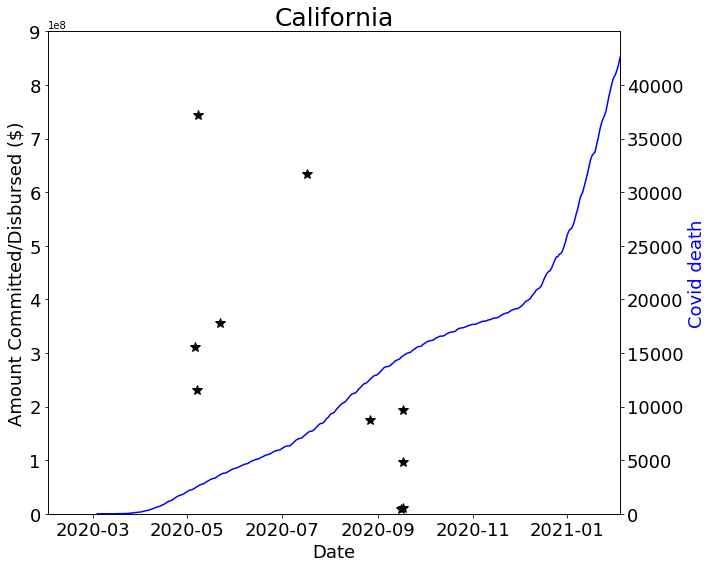

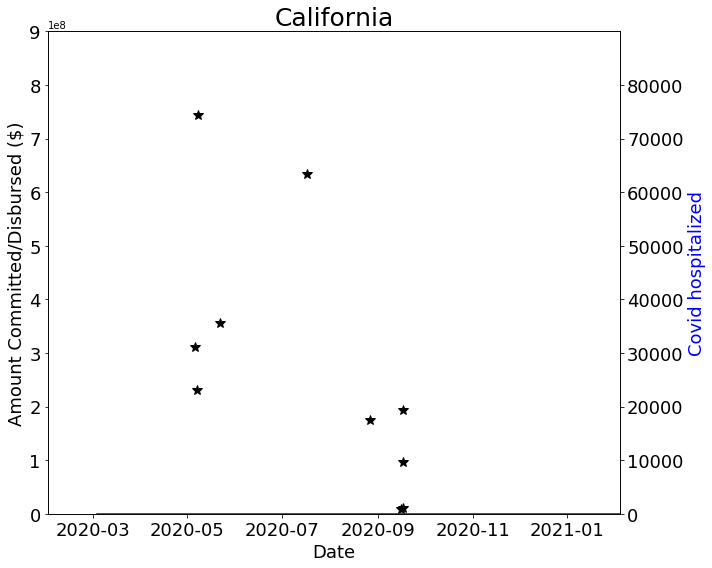

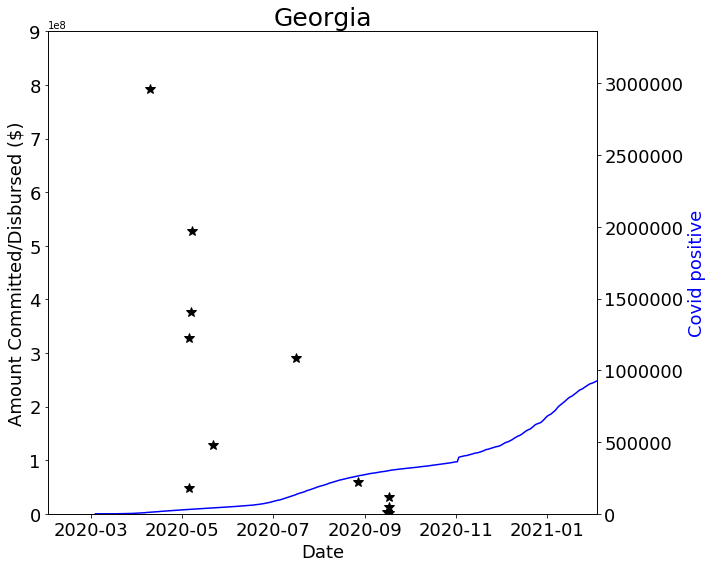

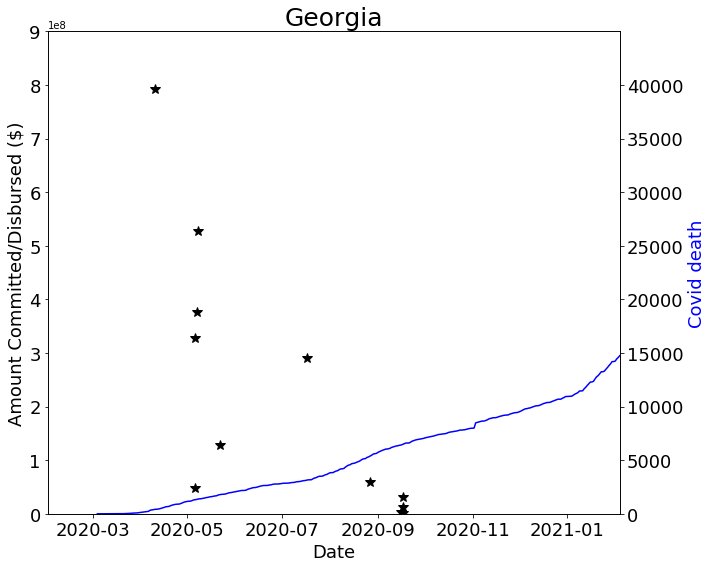

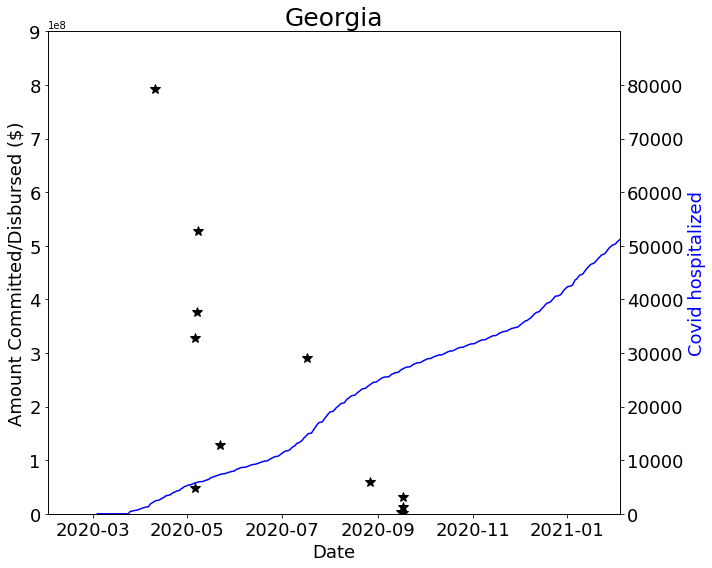

In [15]:
# different amounts in the same date uhmm

interest_list = ['positive','death','hospitalized']
for state in state_OI:
    State_d = states_df.loc[states_df[states]==state]
    State_c = covid_df.loc[covid_df['state']==state]
    for idx,kind in enumerate(interest_list):
        figtitle = state+'_'+interest_list[idx]+'.png'
        ymax = covid_df[kind].max()
        fnc.two_y_linear_plot(State_d['Date'],State_d[money], State_c.date, State_c[kind], "Covid "+kind,ymax, state, fnc.where_save(figtitle))
   